In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
link_drive = "/content/gdrive/My Drive/Final_Project/"

In [13]:
import cv2
from imutils import contours
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def Cut(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,57,5)
  contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
  max = -1
  L = []
  for cnt in contours:
      x, y, w, h = cv2.boundingRect(cnt)
      if cv2.contourArea(cnt) > max:
          x_max, y_max, w_max, h_max = x, y, w, h
          max = cv2.contourArea(cnt)
  table = image[y_max:y_max+h_max, x_max:x_max+w_max]
  return table

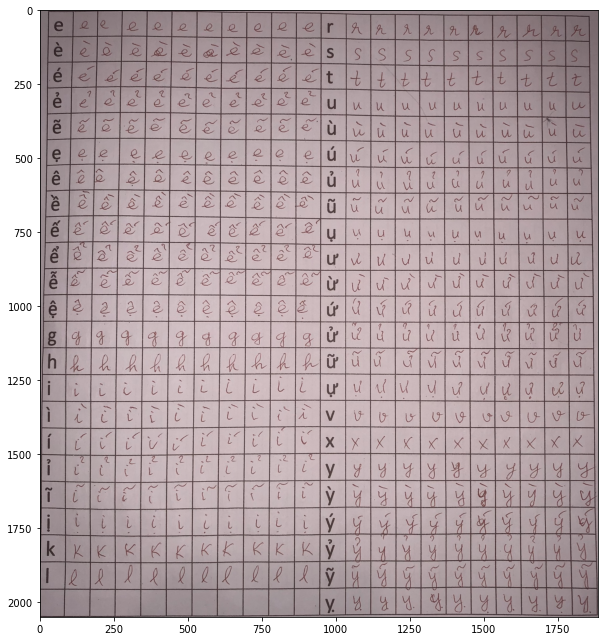

In [19]:
image = cv2.imread('/content/gdrive/My Drive/Final_Project/17.jpg')
image = Cut(image)
plt.figure(figsize=(10,20))
plt.imshow(image, cmap='gray')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,57,5)

In [20]:
cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 1000:
        cv2.drawContours(thresh, [c], -1, (0,0,0), -1)
# Fix horizontal and vertical lines
# Xoá các yếu tố gây nhiễu
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, vertical_kernel, iterations=9)
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,1))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, horizontal_kernel, iterations=4)

# Sort by top to bottom and each row by left to right
invert = 255 - thresh
cnts = cv2.findContours(invert, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="top-to-bottom")

data_rows = []
row = []
for (i, c) in enumerate(cnts, 1):
    area = cv2.contourArea(c)
    if area < 50000:
        row.append(c)
        if i % 9 == 0:  
            (cnts, _) = contours.sort_contours(row, method="left-to-right")
            data_rows.append(cnts)
            row = []

In [21]:
name = 0
for row in data_rows:
  for c in row:
    mask = np.zeros(image.shape, dtype=np.uint8)
    cv2.drawContours(mask, [c], -1, (255,255,255), -1)
    result = cv2.bitwise_and(image, mask)
    result[mask==0] = 255
    img_result = result
    try:
      final = Cut(img_result)
      final = cv2.cvtColor(final, cv2.COLOR_BGR2GRAY)
      final = cv2.cvtColor(final, cv2.COLOR_GRAY2RGB)
      cv2.imwrite('/content/gdrive/My Drive/data_test/' + str(name) + '.jpg' , final) 
      name += 1
    except:
      continue